In [1]:
import pandas as pd
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor,AdaBoostRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score

### datapreprocessing

In [2]:
beta_peakf_lfp0 = pd.read_csv('data/beta_peak_freq_lfp0.csv')
beta_peakf_lfp2 = pd.read_csv('data/beta_peak_freq_lfp2.csv')

beta_power_lfp0 = pd.read_csv('data/beta_power_lfp0.csv')
beta_power_lfp2 = pd.read_csv('data/beta_power_lfp2.csv')

power_diff = pd.read_csv('data/power_diff.csv')
power_ratio = pd.read_csv('data/power_ratio.csv')

hjorth_mobility_lfp0 = pd.read_csv('data/hjorth_mobility_lfp0.csv')
hjorth_mobility_lfp2 = pd.read_csv('data/hjorth_mobility_lfp2.csv')

skewness_lfp0 = pd.read_csv('data/skewness_lfp0.csv')
skewness_lfp2 = pd.read_csv('data/skewness_lfp2.csv')

kurtosis_lfp0 = pd.read_csv('data/kurtosis_lfp0.csv')
kurtosis_lfp2 = pd.read_csv('data/kurtosis_lfp2.csv')

sh_entropy_lfp0 = pd.read_csv('data/entropy_lfp0.csv')
sh_entropy_lfp2 = pd.read_csv('data/entropy_lfp2.csv')

beta_band_coherence = pd.read_csv('data/coherence_lfp0_lfp2.csv')

mean_bbd_lfp0 = pd.read_csv('data/mean_beta_burst_duration_lfp0.csv')
mean_bbd_lfp2 = pd.read_csv('data/mean_beta_burst_duration_lfp2.csv')

beta_power_asymmetry = pd.read_csv('data/beta_power_asymmetry.csv')

pac_lfp0 = pd.read_csv('data/pac_lfp0.csv')
pac_lfp2 = pd.read_csv('data/pac_lfp2.csv')

beta_power_stab_lfp0 = pd.read_csv('data/beta_power_stability_lfp0.csv')
beta_power_stab_lfp2 = pd.read_csv('data/beta_power_stability_lfp2.csv')

cfc_lfp0 = pd.read_csv('data/cfc_lfp0.csv')
cfc_lfp2 = pd.read_csv('data/cfc_lfp2.csv')

motor_score = pd.read_csv('data/mpc_data.csv')

##### indexing

In [3]:
beta_peakf_lfp0.index = ['beta_peakf_lfp0']
beta_peakf_lfp2.index = ['beta_peakf_lfp2']

beta_power_lfp0.index = ['beta_power_lfp0']
beta_power_lfp2.index = ['beta_power_lfp2']

power_diff.index = ['power_diff']
power_ratio.index = ['power_ratio']

hjorth_mobility_lfp0.index = ['hb_lfp0']
hjorth_mobility_lfp2.index = ['hb_lfp2']

skewness_lfp0.index = ['skewness_lfp0']
skewness_lfp2.index = ['skewness_lfp2']

kurtosis_lfp0.index = ['kurtosis_lfp0']
kurtosis_lfp2.index = ['kurtosis_lfp2']

sh_entropy_lfp0.index = ['sh_entropy_lfp0']
sh_entropy_lfp2.index = ['sh_entropy_lfp2']

beta_band_coherence.index = ['beta_band_coherence']

mean_bbd_lfp0.index = ['mean_bbd_lfp0']
mean_bbd_lfp2.index = ['mean_bbd_lfp2']

beta_power_asymmetry.index = ['beta_power_asymmetry']

pac_lfp0.index = ['pac_lfp0']
pac_lfp2.index = ['pac_lfp2']

beta_power_stab_lfp0.index = ['beta_power_stab_lfp0']
beta_power_stab_lfp2.index = ['beta_power_stab_lfp2'] 

cfc_lfp0.index = ['cfc_lfp0']
cfc_lfp2.index = ['cfc_lfp2']

motor_score.index = ['motor_score']

#### transformation

In [4]:
beta_peakf_lfp0 = beta_peakf_lfp0.T
beta_peakf_lfp2 = beta_peakf_lfp2.T

beta_power_lfp0 = beta_power_lfp0.T
beta_power_lfp2 = beta_power_lfp2.T

power_diff = power_diff.T
power_ratio = power_ratio.T

hjorth_mobility_lfp0 = hjorth_mobility_lfp0.T
hjorth_mobility_lfp2 = hjorth_mobility_lfp2.T

skewness_lfp0 = skewness_lfp0.T
skewness_lfp2 = skewness_lfp2.T

kurtosis_lfp0 = kurtosis_lfp0.T
kurtosis_lfp2 = kurtosis_lfp2.T

sh_entropy_lfp0 = sh_entropy_lfp0.T
sh_entropy_lfp2 = sh_entropy_lfp2.T

beta_band_coherence = beta_band_coherence.T

mean_bbd_lfp0 = mean_bbd_lfp0.T
mean_bbd_lfp2 = mean_bbd_lfp2.T

beta_power_asymmetry = beta_power_asymmetry.T

pac_lfp0 = pac_lfp0.T
pac_lfp2 = pac_lfp2.T

beta_power_stab_lfp0 = beta_power_stab_lfp0.T
beta_power_stab_lfp2 = beta_power_stab_lfp2.T

cfc_lfp0 = cfc_lfp0.T
cfc_lfp2 = cfc_lfp2.T

motor_score = motor_score.T

##### extracting row index

In [5]:
# Extract the index from beta_peakf_lfp0
row_index = beta_peakf_lfp0.index
row_index

Index(['p1_x1', 'p1_x2', 'p2_x1', 'p2_x2', 'p2_x3', 'p2_x4', 'p2_x5', 'p2_x6',
       'p2_x7', 'p2_x8', 'p2_x9', 'p2_x10', 'p2_x11', 'p2_x12', 'p3_x1',
       'p3_x2', 'p3_x3', 'p4_x1', 'p4_x2', 'p4_x3', 'p4_x4', 'p4_x5', 'p4_x6',
       'p5_x1', 'p5_x2', 'p5_x3', 'p6_x1', 'p6_x2', 'p6_x3', 'p6_x4', 'p6_x5',
       'p6_x6', 'p6_x7', 'p6_x8', 'p6_x9', 'p6_x10', 'p6_x11', 'p6_x12',
       'p7_x1', 'p7_x2', 'p7_x3', 'p7_x4', 'p7_x5', 'p7_x6', 'p8_x1', 'p8_x2',
       'p8_x3', 'p8_x4', 'p8_x5', 'p8_x6', 'p9_x1', 'p9_x2', 'p9_x3', 'p9_x4',
       'p9_x5', 'p9_x6', 'p9_x7', 'p9_x8', 'p9_x9', 'p9_x10', 'p9_x11',
       'p9_x12', 'p10_x1', 'p10_x2', 'p10_x3', 'p10_x4', 'p10_x5', 'p10_x6',
       'p10_x7', 'p10_x8', 'p11_x1', 'p11_x2', 'p11_x3', 'p11_x4', 'p11_x5',
       'p11_x6', 'p11_x7', 'p11_x8', 'p11_x9', 'p12_x1', 'p12_x2', 'p12_x3',
       'p12_x4', 'p12_x5', 'p12_x6', 'p12_x7', 'p12_x8'],
      dtype='object')

In [6]:
beta_peakf_lfp0 = beta_peakf_lfp0.reset_index(drop=True)
beta_peakf_lfp0

,beta_peakf_lfp0
0,22.031598
1,27.151257
2,15.768549
3,27.953336
4,15.273648
...,...
82,15.307779
83,22.270515
84,22.031598
85,22.304646


In [7]:
beta_peakf_lfp2 = beta_peakf_lfp2.reset_index(drop=True)
beta_peakf_lfp2

,beta_peakf_lfp2
0,14.215586
1,17.935871
2,14.744617
3,16.212253
4,15.068862
...,...
82,15.137124
83,14.027865
84,15.683221
85,15.188321


In [8]:
beta_power_lfp0 = beta_power_lfp0.reset_index(drop=True)
beta_power_lfp0

,beta_power_lfp0
0,10.306337
1,33.170136
2,8.837351
3,10.999450
4,8.863708
...,...
82,8.900126
83,11.388082
84,10.161668
85,10.731291


In [9]:
beta_power_lfp2 = beta_power_lfp2.reset_index(drop=True)
beta_power_lfp2

,beta_power_lfp2
0,3.533068
1,13.945194
2,2.358031
3,3.827034
4,5.996212
...,...
82,12.783154
83,5.944366
84,5.935931
85,5.376945


In [10]:
power_diff = power_diff.reset_index(drop=True)
power_diff

,power_diff
0,-6.773268
1,-19.224942
2,-6.479320
3,-7.172416
4,-2.867496
...,...
82,3.883029
83,-5.443716
84,-4.225737
85,-5.354346


In [11]:
power_ratio = power_ratio.reset_index(drop=True)
power_ratio

,power_ratio
0,0.342805
1,0.420414
2,0.266826
3,0.347930
4,0.676490
...,...
82,1.436289
83,0.521981
84,0.584149
85,0.501053


###

In [12]:
hjorth_mobility_lfp0 = hjorth_mobility_lfp0.reset_index(drop=True)
hjorth_mobility_lfp0

,hb_lfp0
0,0.498136
1,0.581697
2,0.478597
3,0.538728
4,0.506189
...,...
82,0.453625
83,0.482976
84,0.496593
85,0.489711


In [13]:
hjorth_mobility_lfp2 = hjorth_mobility_lfp2.reset_index(drop=True)
hjorth_mobility_lfp2

,hb_lfp2
0,0.491980
1,0.446251
2,0.479173
3,0.483530
4,0.482051
...,...
82,0.446491
83,0.464413
84,0.471133
85,0.483125


In [14]:
skewness_lfp0 = skewness_lfp0.reset_index(drop=True)
skewness_lfp0

,skewness_lfp0
0,-0.057924
1,-0.057419
2,-0.039276
3,-0.065004
4,-0.018205
...,...
82,0.089313
83,0.029357
84,0.058958
85,0.068516


In [15]:
skewness_lfp2 = skewness_lfp2.reset_index(drop=True)
skewness_lfp2

,skewness_lfp2
0,-0.047028
1,-0.002274
2,-0.043310
3,0.039480
4,-0.009594
...,...
82,0.070543
83,0.069305
84,-0.008529
85,0.017908


In [16]:
kurtosis_lfp0 = kurtosis_lfp0.reset_index(drop=True)
kurtosis_lfp0

,kurtosis_lfp0
0,0.490869
1,0.602326
2,0.758270
3,0.451677
4,0.817765
...,...
82,0.858737
83,0.486252
84,1.642694
85,0.941078


In [17]:
kurtosis_lfp2 = kurtosis_lfp2.reset_index(drop=True)
kurtosis_lfp2

,kurtosis_lfp2
0,0.346398
1,0.170462
2,0.009906
3,0.204431
4,0.575779
...,...
82,0.692564
83,1.954133
84,2.284957
85,3.126858


In [18]:
sh_entropy_lfp0 = sh_entropy_lfp0.reset_index(drop=True)
sh_entropy_lfp0

,sh_entropy_lfp0
0,5.681099
1,5.653672
2,5.416976
3,5.466761
4,5.574577
...,...
82,5.417419
83,5.662654
84,5.380821
85,5.587641


In [19]:
sh_entropy_lfp2 = sh_entropy_lfp2.reset_index(drop=True)
sh_entropy_lfp2

,sh_entropy_lfp2
0,5.631829
1,5.538165
2,5.789860
3,5.633256
4,5.593606
...,...
82,5.481675
83,5.301976
84,5.174536
85,5.233255


In [20]:
beta_band_coherence = beta_band_coherence.reset_index(drop=True)
beta_band_coherence

,beta_band_coherence
0,0.156163
1,0.146289
2,0.146502
3,0.142263
4,0.157079
...,...
82,0.150387
83,0.156515
84,0.151415
85,0.163494


In [21]:
mean_bbd_lfp0 = mean_bbd_lfp0.reset_index(drop=True)
mean_bbd_lfp0

,mean_bbd_lfp0
0,0.005818
1,0.004996
2,0.006607
3,0.005402
4,0.006132
...,...
82,0.006546
83,0.005726
84,0.006100
85,0.006159


In [22]:
mean_bbd_lfp2 = mean_bbd_lfp2.reset_index(drop=True)
mean_bbd_lfp2

,mean_bbd_lfp2
0,0.006168
1,0.006865
2,0.005760
3,0.005882
4,0.006375
...,...
82,0.006919
83,0.007660
84,0.007712
85,0.008102


In [23]:
beta_power_asymmetry = beta_power_asymmetry.reset_index(drop=True)
beta_power_asymmetry

,beta_power_asymmetry
0,-0.489419
1,-0.408040
2,-0.578749
3,-0.483757
4,-0.192968
...,...
82,0.179079
83,-0.314077
84,-0.262507
85,-0.332398


In [24]:
pac_lfp0 = pac_lfp0.reset_index(drop=True)
pac_lfp0

,pac_lfp0
0,0.000336
1,0.000287
2,0.000245
3,0.000163
4,0.000326
...,...
82,0.000483
83,0.000342
84,0.000327
85,0.000436


In [25]:
pac_lfp2 = pac_lfp2.reset_index(drop=True)
pac_lfp2

,pac_lfp2
0,0.000315
1,0.000387
2,0.000192
3,0.000672
4,0.000326
...,...
82,0.000372
83,0.000301
84,0.000615
85,0.000636


In [26]:
beta_power_stab_lfp0 = beta_power_stab_lfp0.reset_index(drop=True)
beta_power_stab_lfp0

,beta_power_stab_lfp0
0,1.317437
1,3.298529
2,4.022782
3,2.215428
4,4.021380
...,...
82,0.564778
83,1.570627
84,1.337872
85,1.816824


In [27]:
beta_power_stab_lfp2 = beta_power_stab_lfp2.reset_index(drop=True)
beta_power_stab_lfp2

,beta_power_stab_lfp2
0,0.355230
1,2.201226
2,0.084029
3,0.303450
4,1.506637
...,...
82,1.771462
83,0.451661
84,0.871259
85,0.505013


In [28]:
cfc_lfp0 = cfc_lfp0.reset_index(drop=True)
cfc_lfp0

,cfc_lfp0
0,0.168406
1,0.234405
2,0.073433
3,0.089324
4,0.086111
...,...
82,0.076364
83,0.112323
84,0.095936
85,0.125528


In [29]:
cfc_lfp2 = cfc_lfp2.reset_index(drop=True)
cfc_lfp2

,cfc_lfp2
0,0.057127
1,0.125486
2,0.029659
3,0.069670
4,0.081557
...,...
82,0.112628
83,0.079401
84,0.094112
85,0.115754


In [30]:
motor_score = motor_score.reset_index(drop=True)
motor_score

,motor_score
0,83.108824
1,96.458592
2,148.599056
3,126.365803
4,105.526208
...,...
82,131.200587
83,233.384897
84,188.739309
85,127.114523


#### data concatination

In [31]:
data_df = pd.concat([
    beta_peakf_lfp0,
    beta_peakf_lfp2,
    beta_power_lfp0,
    beta_power_lfp2,
    power_diff,
    power_ratio,
    hjorth_mobility_lfp0,
    hjorth_mobility_lfp2,
    skewness_lfp0,
    skewness_lfp2,
    kurtosis_lfp0,
    kurtosis_lfp2,
    sh_entropy_lfp0,
    sh_entropy_lfp2,
    beta_band_coherence,
    mean_bbd_lfp0,
    mean_bbd_lfp2,
    beta_power_asymmetry,
    pac_lfp0,
    pac_lfp2,
    beta_power_stab_lfp0,
    beta_power_stab_lfp2,
    cfc_lfp0,
    cfc_lfp2,
    motor_score
], axis=1)

data_df

,beta_peakf_lfp0,beta_peakf_lfp2,beta_power_lfp0,beta_power_lfp2,power_diff,power_ratio,hb_lfp0,hb_lfp2,skewness_lfp0,skewness_lfp2,...,mean_bbd_lfp0,mean_bbd_lfp2,beta_power_asymmetry,pac_lfp0,pac_lfp2,beta_power_stab_lfp0,beta_power_stab_lfp2,cfc_lfp0,cfc_lfp2,motor_score
0,22.031598,14.215586,10.306337,3.533068,-6.773268,0.342805,0.498136,0.491980,-0.057924,-0.047028,...,0.005818,0.006168,-0.489419,0.000336,0.000315,1.317437,0.355230,0.168406,0.057127,83.108824
1,27.151257,17.935871,33.170136,13.945194,-19.224942,0.420414,0.581697,0.446251,-0.057419,-0.002274,...,0.004996,0.006865,-0.408040,0.000287,0.000387,3.298529,2.201226,0.234405,0.125486,96.458592
2,15.768549,14.744617,8.837351,2.358031,-6.479320,0.266826,0.478597,0.479173,-0.039276,-0.043310,...,0.006607,0.005760,-0.578749,0.000245,0.000192,4.022782,0.084029,0.073433,0.029659,148.599056
3,27.953336,16.212253,10.999450,3.827034,-7.172416,0.347930,0.538728,0.483530,-0.065004,0.039480,...,0.005402,0.005882,-0.483757,0.000163,0.000672,2.215428,0.303450,0.089324,0.069670,126.365803
4,15.273648,15.068862,8.863708,5.996212,-2.867496,0.676490,0.506189,0.482051,-0.018205,-0.009594,...,0.006132,0.006375,-0.192968,0.000326,0.000326,4.021380,1.506637,0.086111,0.081557,105.526208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,15.307779,15.137124,8.900126,12.783154,3.883029,1.436289,0.453625,0.446491,0.089313,0.070543,...,0.006546,0.006919,0.179079,0.000483,0.000372,0.564778,1.771462,0.076364,0.112628,131.200587
83,22.270515,14.027865,11.388082,5.944366,-5.443716,0.521981,0.482976,0.464413,0.029357,0.069305,...,0.005726,0.007660,-0.314077,0.000342,0.000301,1.570627,0.451661,0.112323,0.079401,233.384897
84,22.031598,15.683221,10.161668,5.935931,-4.225737,0.584149,0.496593,0.471133,0.058958,-0.008529,...,0.006100,0.007712,-0.262507,0.000327,0.000615,1.337872,0.871259,0.095936,0.094112,188.739309
85,22.304646,15.188321,10.731291,5.376945,-5.354346,0.501053,0.489711,0.483125,0.068516,0.017908,...,0.006159,0.008102,-0.332398,0.000436,0.000636,1.816824,0.505013,0.125528,0.115754,127.114523


In [32]:
data_df = data_df.set_index(row_index)
data_df

,beta_peakf_lfp0,beta_peakf_lfp2,beta_power_lfp0,beta_power_lfp2,power_diff,power_ratio,hb_lfp0,hb_lfp2,skewness_lfp0,skewness_lfp2,...,mean_bbd_lfp0,mean_bbd_lfp2,beta_power_asymmetry,pac_lfp0,pac_lfp2,beta_power_stab_lfp0,beta_power_stab_lfp2,cfc_lfp0,cfc_lfp2,motor_score
p1_x1,22.031598,14.215586,10.306337,3.533068,-6.773268,0.342805,0.498136,0.491980,-0.057924,-0.047028,...,0.005818,0.006168,-0.489419,0.000336,0.000315,1.317437,0.355230,0.168406,0.057127,83.108824
p1_x2,27.151257,17.935871,33.170136,13.945194,-19.224942,0.420414,0.581697,0.446251,-0.057419,-0.002274,...,0.004996,0.006865,-0.408040,0.000287,0.000387,3.298529,2.201226,0.234405,0.125486,96.458592
p2_x1,15.768549,14.744617,8.837351,2.358031,-6.479320,0.266826,0.478597,0.479173,-0.039276,-0.043310,...,0.006607,0.005760,-0.578749,0.000245,0.000192,4.022782,0.084029,0.073433,0.029659,148.599056
p2_x2,27.953336,16.212253,10.999450,3.827034,-7.172416,0.347930,0.538728,0.483530,-0.065004,0.039480,...,0.005402,0.005882,-0.483757,0.000163,0.000672,2.215428,0.303450,0.089324,0.069670,126.365803
p2_x3,15.273648,15.068862,8.863708,5.996212,-2.867496,0.676490,0.506189,0.482051,-0.018205,-0.009594,...,0.006132,0.006375,-0.192968,0.000326,0.000326,4.021380,1.506637,0.086111,0.081557,105.526208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_x4,15.307779,15.137124,8.900126,12.783154,3.883029,1.436289,0.453625,0.446491,0.089313,0.070543,...,0.006546,0.006919,0.179079,0.000483,0.000372,0.564778,1.771462,0.076364,0.112628,131.200587
p12_x5,22.270515,14.027865,11.388082,5.944366,-5.443716,0.521981,0.482976,0.464413,0.029357,0.069305,...,0.005726,0.007660,-0.314077,0.000342,0.000301,1.570627,0.451661,0.112323,0.079401,233.384897
p12_x6,22.031598,15.683221,10.161668,5.935931,-4.225737,0.584149,0.496593,0.471133,0.058958,-0.008529,...,0.006100,0.007712,-0.262507,0.000327,0.000615,1.337872,0.871259,0.095936,0.094112,188.739309
p12_x7,22.304646,15.188321,10.731291,5.376945,-5.354346,0.501053,0.489711,0.483125,0.068516,0.017908,...,0.006159,0.008102,-0.332398,0.000436,0.000636,1.816824,0.505013,0.125528,0.115754,127.114523


In [35]:
data_df.shape

(87, 25)

##### saving data_df in csv format

In [37]:
file_path = './data_df.csv'

data_df.to_csv(file_path, index=False)
data_df

,beta_peakf_lfp0,beta_peakf_lfp2,beta_power_lfp0,beta_power_lfp2,power_diff,power_ratio,hb_lfp0,hb_lfp2,skewness_lfp0,skewness_lfp2,...,mean_bbd_lfp0,mean_bbd_lfp2,beta_power_asymmetry,pac_lfp0,pac_lfp2,beta_power_stab_lfp0,beta_power_stab_lfp2,cfc_lfp0,cfc_lfp2,motor_score
p1_x1,22.031598,14.215586,10.306337,3.533068,-6.773268,0.342805,0.498136,0.491980,-0.057924,-0.047028,...,0.005818,0.006168,-0.489419,0.000336,0.000315,1.317437,0.355230,0.168406,0.057127,83.108824
p1_x2,27.151257,17.935871,33.170136,13.945194,-19.224942,0.420414,0.581697,0.446251,-0.057419,-0.002274,...,0.004996,0.006865,-0.408040,0.000287,0.000387,3.298529,2.201226,0.234405,0.125486,96.458592
p2_x1,15.768549,14.744617,8.837351,2.358031,-6.479320,0.266826,0.478597,0.479173,-0.039276,-0.043310,...,0.006607,0.005760,-0.578749,0.000245,0.000192,4.022782,0.084029,0.073433,0.029659,148.599056
p2_x2,27.953336,16.212253,10.999450,3.827034,-7.172416,0.347930,0.538728,0.483530,-0.065004,0.039480,...,0.005402,0.005882,-0.483757,0.000163,0.000672,2.215428,0.303450,0.089324,0.069670,126.365803
p2_x3,15.273648,15.068862,8.863708,5.996212,-2.867496,0.676490,0.506189,0.482051,-0.018205,-0.009594,...,0.006132,0.006375,-0.192968,0.000326,0.000326,4.021380,1.506637,0.086111,0.081557,105.526208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_x4,15.307779,15.137124,8.900126,12.783154,3.883029,1.436289,0.453625,0.446491,0.089313,0.070543,...,0.006546,0.006919,0.179079,0.000483,0.000372,0.564778,1.771462,0.076364,0.112628,131.200587
p12_x5,22.270515,14.027865,11.388082,5.944366,-5.443716,0.521981,0.482976,0.464413,0.029357,0.069305,...,0.005726,0.007660,-0.314077,0.000342,0.000301,1.570627,0.451661,0.112323,0.079401,233.384897
p12_x6,22.031598,15.683221,10.161668,5.935931,-4.225737,0.584149,0.496593,0.471133,0.058958,-0.008529,...,0.006100,0.007712,-0.262507,0.000327,0.000615,1.337872,0.871259,0.095936,0.094112,188.739309
p12_x7,22.304646,15.188321,10.731291,5.376945,-5.354346,0.501053,0.489711,0.483125,0.068516,0.017908,...,0.006159,0.008102,-0.332398,0.000436,0.000636,1.816824,0.505013,0.125528,0.115754,127.114523


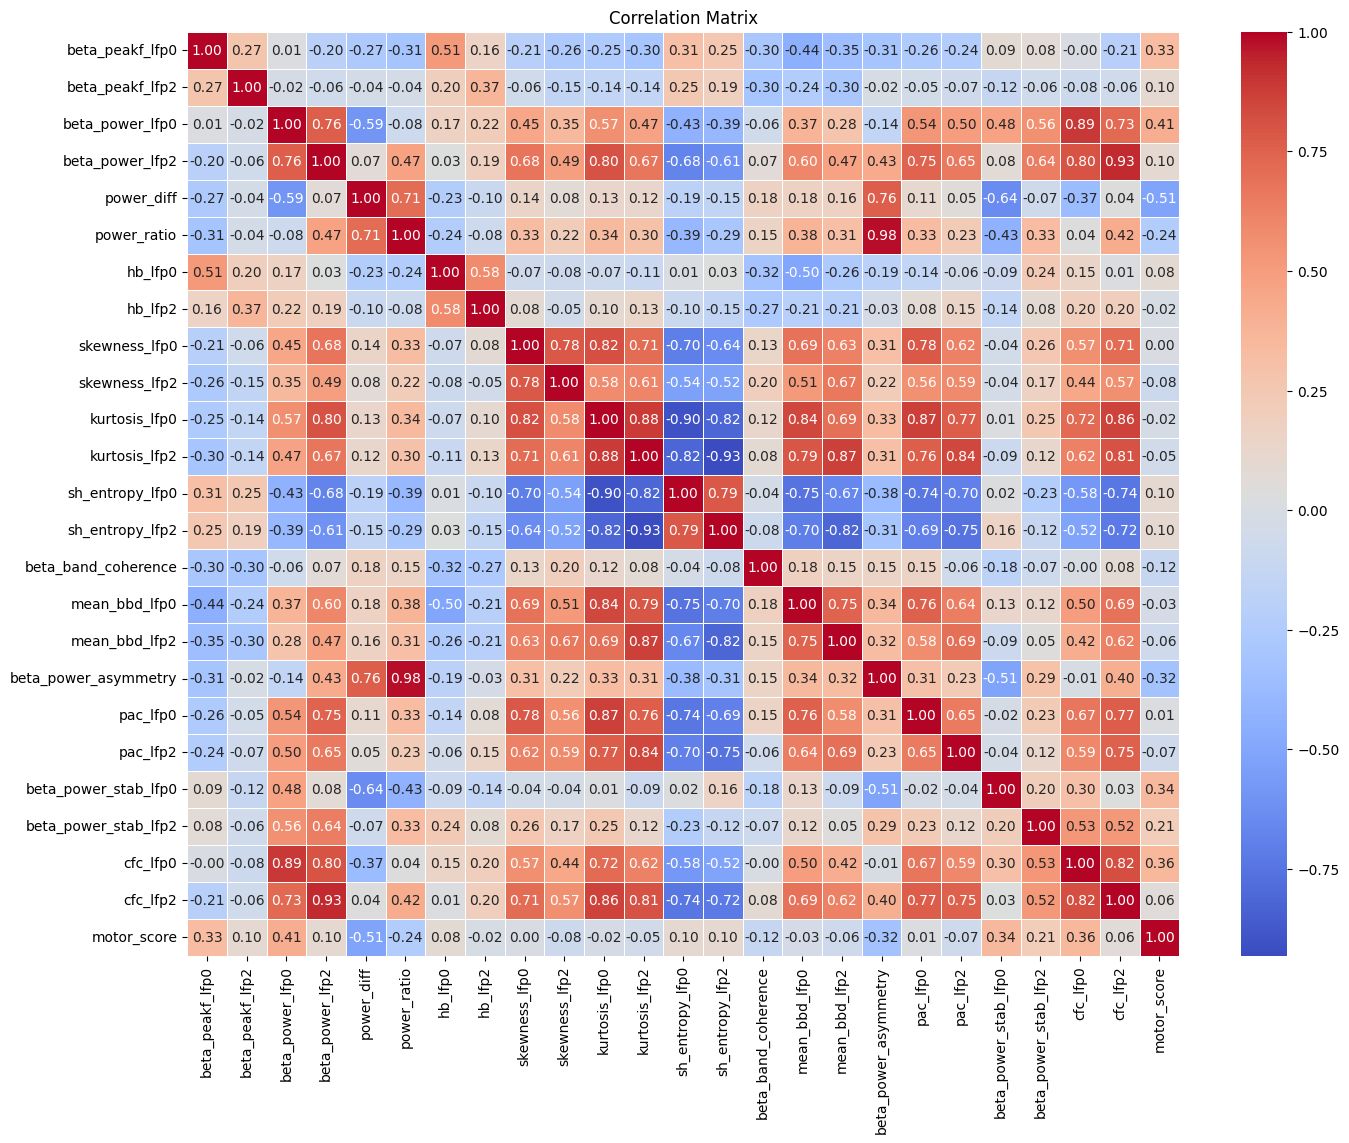

In [34]:
# Heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
correlation_matrix = data_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Preparing X and y

In [34]:
target = ['motor_score']

features = ['beta_peakf_lfp0','beta_peakf_lfp2','beta_power_lfp0', 
            'beta_power_lfp2', 'power_diff', 'power_ratio', 'hb_lfp0',
            'hb_lfp2','skewness_lfp0','skewness_lfp2','kurtosis_lfp0',
            'kurtosis_lfp2', 'sh_entropy_lfp0','sh_entropy_lfp2',
            'beta_band_coherence','mean_bbd_lfp0','mean_bbd_lfp2','beta_power_asymmetry',
            'pac_lfp0','pac_lfp2','beta_power_stab_lfp0','beta_power_stab_lfp2','cfc_lfp0','cfc_lfp2']

selected_features = ['power_diff','beta_power_stab_lfp0']    # features we will utilize
 
X = data_df.drop(columns=target)

X = X[selected_features]
X

,power_diff,beta_power_stab_lfp0
p1_x1,-6.773268,1.317437
p1_x2,-19.224942,3.298529
p2_x1,-6.479320,4.022782
p2_x2,-7.172416,2.215428
p2_x3,-2.867496,4.021380
...,...,...
p12_x4,3.883029,0.564778
p12_x5,-5.443716,1.570627
p12_x6,-4.225737,1.337872
p12_x7,-5.354346,1.816824


In [35]:
y = data_df[target]
y

,motor_score
p1_x1,83.108824
p1_x2,96.458592
p2_x1,148.599056
p2_x2,126.365803
p2_x3,105.526208
...,...
p12_x4,131.200587
p12_x5,233.384897
p12_x6,188.739309
p12_x7,127.114523


#### motor score distribution

In [36]:
# Define the ranges
bins = [50, 100, 150, 200, 250, 300, 350, 400, 450]

# Use pd.cut to bin the motor score values into the ranges
motor_score_bins = pd.cut(y['motor_score'], bins=bins)

# Count how many motor scores fall into each range
motor_score_count = motor_score_bins.value_counts().sort_index()

print('motor score distribution:',motor_score_count)

motor score distribution: motor_score
(50, 100]     11
(100, 150]    43
(150, 200]    13
(200, 250]     9
(250, 300]     5
(300, 350]     4
(350, 400]     0
(400, 450]     1
Name: count, dtype: int64


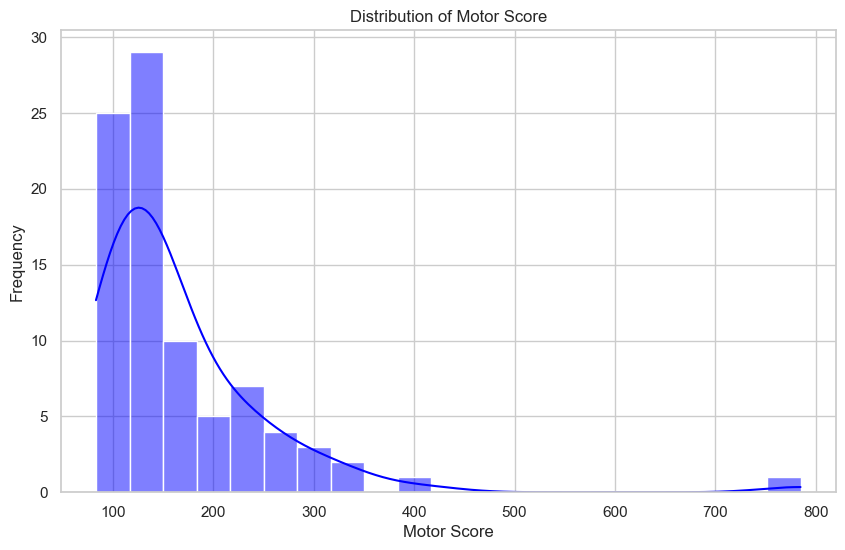

In [288]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of motor_score
plt.figure(figsize=(10, 6))
sns.histplot(data_df['motor_score'], kde=True, color='blue')
plt.title('Distribution of Motor Score')
plt.xlabel('Motor Score')
plt.ylabel('Frequency')
plt.show()

#### Data Augmentation

In [138]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def custom_smote(X, y, n_samples):
    
    # Convert inputs to numpy arrays if they're not already
    X = np.array(X)
    y = np.array(y).ravel()  # Ensure y is 1D

    # Initialize NearestNeighbors
    nn = NearestNeighbors(n_neighbors=2)  # Using 2 neighbors for interpolation
    nn.fit(X)

    # Generate synthetic samples
    synthetic_X = []
    synthetic_y = []

    # Iterate to generate synthetic samples
    for _ in range(n_samples):
        # Select a random index
        idx = np.random.randint(0, len(X))

        # Find the nearest neighbors
        distances, indices = nn.kneighbors([X[idx]], n_neighbors=2)

        # Select one of the nearest neighbors
        nn_idx = indices[0][1]

        # Generate synthetic sample by interpolation
        alpha = np.random.uniform(0, 1)
        synthetic_sample = X[idx] + alpha * (X[nn_idx] - X[idx])
        synthetic_target = y[idx] + alpha * (y[nn_idx] - y[idx])

        # Append synthetic samples
        synthetic_X.append(synthetic_sample)
        synthetic_y.append(synthetic_target)

    # Convert synthetic samples to numpy arrays
    synthetic_X = np.array(synthetic_X)
    synthetic_y = np.array(synthetic_y)

    # Combine original and synthetic samples
    X_resampled = np.vstack([X, synthetic_X])
    y_resampled = np.concatenate([y, synthetic_y])

    return pd.DataFrame(X_resampled, columns=[f'feature_{i}' for i in range(X.shape[1])]), pd.Series(y_resampled, name='motor_score')

X_resampled, y_resampled = custom_smote(X, y, n_samples=170)


In [139]:
X_resampled

,feature_0,feature_1
0,-6.773268,1.317437
1,-19.224942,3.298529
2,-6.479320,4.022782
3,-7.172416,2.215428
4,-2.867496,4.021380
...,...,...
252,-28.213234,10.090186
253,-38.822586,5.407082
254,-7.307881,5.798921
255,-0.709159,0.521926


In [140]:
y_resampled

0       83.108824
1       96.458592
2      148.599056
3      126.365803
4      105.526208
          ...    
252    401.821788
253    388.037982
254    222.644452
255    131.656651
256    183.168990
Name: motor_score, Length: 257, dtype: float64

### motor score distribution after augmentation

In [141]:
# Define the ranges
bins = [50, 100, 150, 200, 250, 300, 350, 400, 450]

# Use pd.cut to bin the motor score values into the ranges
motor_score_bins = pd.cut(y_resampled, bins=bins)

# Count how many motor scores fall into each range
motor_score_count = motor_score_bins.value_counts().sort_index()

print('motor score distribution after augmentation:\n',motor_score_count)

motor score distribution after augmentation:
 motor_score
(50, 100]      21
(100, 150]    139
(150, 200]     42
(200, 250]     22
(250, 300]     14
(300, 350]      8
(350, 400]      2
(400, 450]      5
Name: count, dtype: int64


#### Data Splitting X_train, X_test, y_train, y_test

In [142]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
print('Shape of X_train', X_train_scaled.shape)
print('Shape of y_train', y_train.shape)

print('Shape of X_test', X_test_scaled.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (205, 2)
Shape of y_train (205,)
Shape of X_test (52, 2)
Shape of y_test (52,)


### Random Forest Regressor

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Train the model
rf_regressor = RandomForestRegressor(max_depth=None, n_estimators=1000, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [145]:
# Get predictions for training and testing
y_train_pred = rf_regressor.predict(X_train_scaled)
y_test_pred = rf_regressor.predict(X_test_scaled)

In [146]:
# Calculate accuracy (R-squared score)
accuracy = rf_regressor.score(X_test_scaled, y_test)
print('Accuracy = ' + str(accuracy))

mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE (Testing) = ' + str(mse_test))

# Calculate Root Mean Squared Logarithmic Error (RMSLE) for testing data
rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
print('RMSLE = ' + str(rmsle))

Accuracy = 0.9269583762146982
MSE (Testing) = 272.63375272808355
RMSLE = 0.09462458424531676


In [147]:
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred}))

         Actual   Predicted
165  115.587109  125.161264
186  166.980911  177.208643
82   131.200587  128.536171
30   328.363875  275.717410
9     99.004492  117.842495
6    108.620412  111.497444
200  149.505153  144.262734
24   104.119023  127.555948
120  115.584833  125.161264
101  177.306553  165.149359
114  123.314741  150.230852
55   138.571295  140.174438
33   128.821403  113.694106
162  137.032328  165.638439
97   221.457228  207.288947
231  107.463544  127.785344
45   265.411351  223.428956
73   125.861187  126.641249
252  401.821788  388.420883
225  122.990899  119.095176
15    88.452102   91.246103
90   132.121152  130.163765
223  135.478414  151.058795
240  182.622915  192.105761
208  186.475592  183.437301
19   115.158922  122.392659
159  191.591108  173.496370
192  131.002266  133.675446
255  131.656651  130.163765
181  124.338217  129.085965
243  110.640172  110.329359
182   86.674896   89.614618
10   103.067417  108.730373
175  118.503324  120.043695
67   150.845996  142

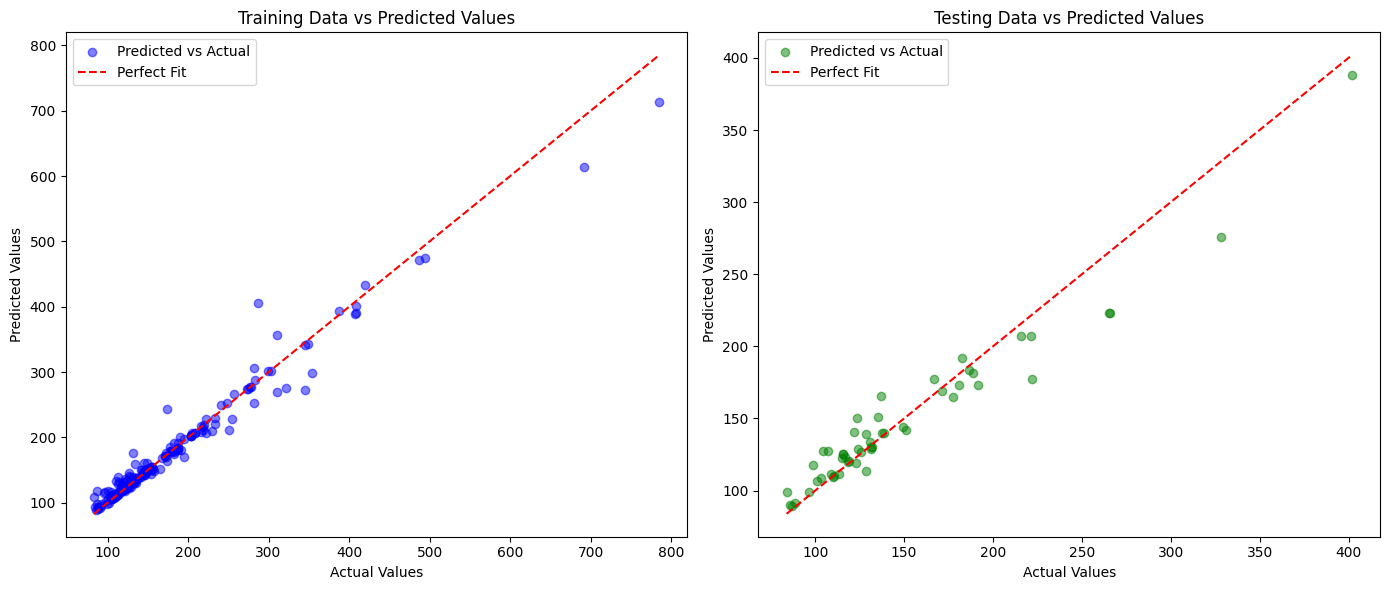

In [149]:
# Plot training and testing data vs. predicted values
plt.figure(figsize=(14, 6))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Training Data vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Testing Data vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')

# Show plots
plt.tight_layout()
plt.show()


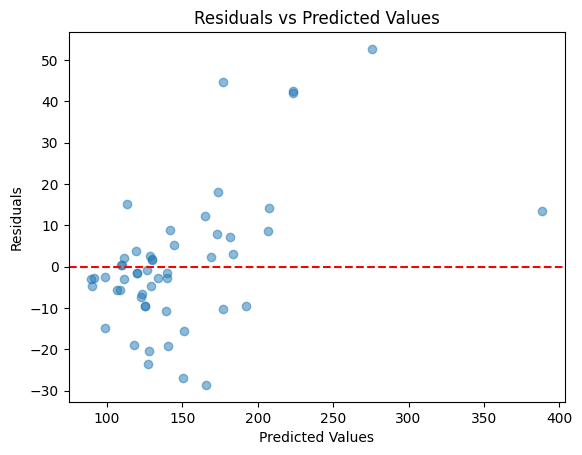

In [150]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

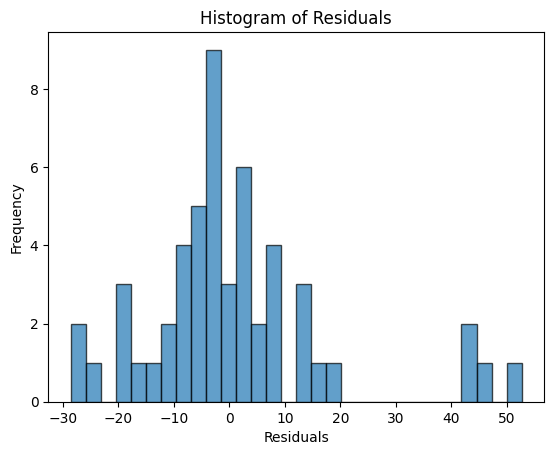

In [151]:
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [152]:
dummy_input = np.array([[1.29, -0.7]])  # input of scaled value

# Predict using the trained model
test_pred = rf_regressor.predict(dummy_input)

print('Predicted motor score for the dummy input:', test_pred)

Predicted motor score for the dummy input: [124.3249748]


In [153]:
X_test_scaled

array([[ 0.85979331, -0.7962779 ],
       [-0.37046086,  0.28549231],
       [ 1.27021298, -0.75173993],
       [-0.52299443,  0.68881818],
       [ 0.40357158, -0.72333995],
       [ 0.4875343 , -0.25247861],
       [ 0.85224563, -0.75497744],
       [ 0.83081545, -0.70003347],
       [ 0.85980093, -0.79629594],
       [ 0.5040721 , -0.47847425],
       [ 0.64290252,  0.62780028],
       [ 0.22102092, -0.65987678],
       [ 0.72153917, -0.71219258],
       [ 0.27504101, -0.24248094],
       [ 0.28121902, -0.58386046],
       [ 0.83012534, -0.69989338],
       [-0.62521289,  0.43222352],
       [ 0.8263608 , -0.78368299],
       [-1.66388024,  2.02907121],
       [ 0.80146558, -0.66518491],
       [ 0.44988562, -0.33301538],
       [ 0.85046387, -0.76400844],
       [ 0.63592203,  0.88109964],
       [-1.63927963,  1.34481306],
       [ 0.52768344, -0.53249412],
       [ 0.86122611, -0.7996723 ],
       [ 0.38734399, -0.42368469],
       [ 0.56973287, -0.31906393],
       [ 0.85041627,

In [154]:
y_test_pred.reshape(52,1)

array([[125.16126382],
       [177.20864324],
       [128.53617096],
       [275.71740963],
       [117.84249464],
       [111.49744425],
       [144.26273388],
       [127.55594797],
       [125.16126382],
       [165.14935879],
       [150.23085227],
       [140.17443843],
       [113.69410572],
       [165.63843911],
       [207.28894657],
       [127.78534448],
       [223.42895558],
       [126.64124946],
       [388.4208827 ],
       [119.0951761 ],
       [ 91.24610286],
       [130.16376503],
       [151.05879518],
       [192.10576106],
       [183.43730052],
       [122.39265903],
       [173.4963699 ],
       [133.67544632],
       [130.16376503],
       [129.08596526],
       [110.32935939],
       [ 89.61461837],
       [108.7303732 ],
       [120.04369544],
       [142.09640085],
       [177.31570804],
       [109.38536829],
       [120.31040498],
       [140.72765147],
       [173.04188227],
       [140.17443843],
       [168.99315677],
       [ 90.22471761],
       [106

### XGBoost

In [155]:
import xgboost as xgb

# Initialize XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xg_reg.fit(X_train, y_train)

# Predict on test data
y_test_pred = xg_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate Accuracy (R² Score)
accuracy = r2_score(y_test, y_test_pred)

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

# Print the results
print(f"MSE: {mse}")
print(f"Accuracy (R²): {accuracy}")
print(f"RMSLE: {rmsle}")

MSE: 302.7570749458867
Accuracy (R²): 0.9188880021447984
RMSLE: 0.1137370889919321


In [156]:
# Create a DataFrame for comparison of actual and predicted values
comparison_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Display the first few rows of comparison
print(comparison_xgb)

         Actual   Predicted
165  115.587109  136.505569
186  166.980911  162.920822
82   131.200587  130.726639
30   328.363875  298.798157
9     99.004492  107.642235
6    108.620412  126.346786
200  149.505153  135.365738
24   104.119023  113.790192
120  115.584833  136.505569
101  177.306553  159.767746
114  123.314741  134.233963
55   138.571295  175.045441
33   128.821403  104.488655
162  137.032328  131.692780
97   221.457228  221.718552
231  107.463544  113.790192
45   265.411351  234.061432
73   125.861187  164.742218
252  401.821788  407.035095
225  122.990899   88.531441
15    88.452102   87.837517
90   132.121152  120.619499
223  135.478414  125.151131
240  182.622915  157.100494
208  186.475592  180.413635
19   115.158922  136.505569
159  191.591108  194.421005
192  131.002266  122.466263
255  131.656651  120.619499
181  124.338217  125.530220
243  110.640172  108.780830
182   86.674896   86.012787
10   103.067417  107.026489
175  118.503324  119.161774
67   150.845996  144

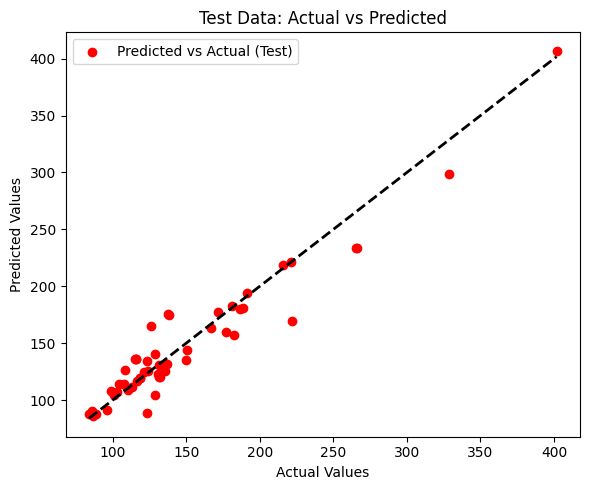

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

# Scatter plot for predicted vs actual values in the test data
plt.scatter(y_test, y_test_pred, color='red', label='Predicted vs Actual (Test)')

# Plot the line for ideal predictions (diagonal line where actual equals predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


### Ensemble Learning

In [158]:
# Stacking Ensemble Model
stacked_model = StackingRegressor(
    estimators=[
        ('random_forest', rf_regressor), 
        ('xgboost', xg_reg)
    ],
    final_estimator=Ridge()
)

# Train the Stacking model
stacked_model.fit(X_train_scaled, y_train)

# Stacking Model Predictions
y_test_pred_stacked = stacked_model.predict(X_test_scaled)

# Stacking Model Metrics
stacked_mse = mean_squared_error(y_test, y_test_pred_stacked)
stacked_r2 = r2_score(y_test, y_test_pred_stacked)
stacked_rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred_stacked))

print('Stacking Ensemble Results:')
print(f'Stacking MSE: {stacked_mse}')
print(f'Stacking R²: {stacked_r2}')
print(f'Stacking RMSLE: {stacked_rmsle}')

Stacking Ensemble Results:
Stacking MSE: 265.240249120804
Stacking R²: 0.9289391783110432
Stacking RMSLE: 0.09250712602813496


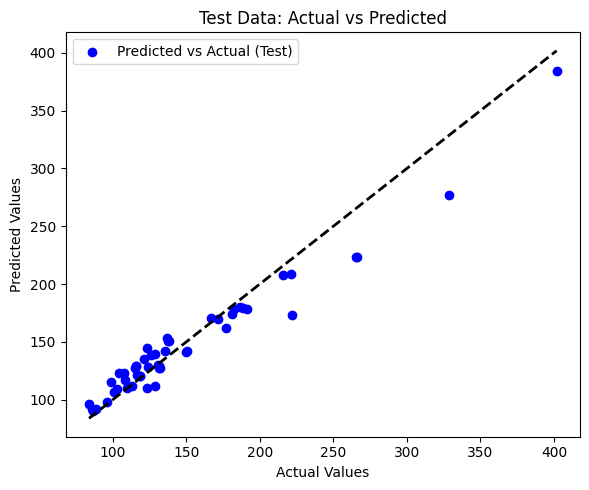

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

# Scatter plot for predicted vs actual values in the test data
plt.scatter(y_test, y_test_pred_stacked, color='blue', label='Predicted vs Actual (Test)')

# Plot the line for ideal predictions (diagonal line where actual equals predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [160]:
# Create a DataFrame for comparison of actual and predicted values
comparison_ensemble = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_stacked})

# Display the first few rows of comparison
print(comparison_ensemble)

         Actual   Predicted
165  115.587109  128.906380
186  166.980911  170.905221
82   131.200587  129.295841
30   328.363875  277.149642
9     99.004492  115.166124
6    108.620412  116.876190
200  149.505153  140.944884
24   104.119023  123.383732
120  115.584833  128.906380
101  177.306553  162.098548
114  123.314741  144.464597
55   138.571295  150.653464
33   128.821403  111.492113
162  137.032328  153.669848
97   221.457228  208.739108
231  107.463544  123.532571
45   265.411351  223.056321
73   125.861187  138.663035
252  401.821788  383.993351
225  122.990899  110.025427
15    88.452102   91.739964
90   132.121152  127.203254
223  135.478414  142.172269
240  182.622915  178.757732
208  186.475592  180.395989
19   115.158922  127.110028
159  191.591108  178.309658
192  131.002266  130.057046
255  131.656651  127.203254
181  124.338217  128.033754
243  110.640172  110.646084
182   86.674896   90.112962
10   103.067417  109.062095
175  118.503324  120.182942
67   150.845996  142

### Decision Tree Regression

In [161]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=20, random_state=42)

# Train the model using the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Ensure the predictions and actual values are 1D
y_train = np.ravel(y_train)
y_train_pred_dt = np.ravel(y_train_pred_dt)
y_test = np.ravel(y_test)
y_test_pred_dt = np.ravel(y_test_pred_dt)

# Calculate the Mean Squared Error for Decision Tree model
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
print('Mean Squared Error DT =', mse_dt)

# Accuracy (R² score)
accuracy_dt = r2_score(y_test, y_test_pred_dt)
print('Accuracy DT =', accuracy_dt)


Mean Squared Error DT = 321.44749773962405
Accuracy DT = 0.9138806293729833


In [162]:
# Create a DataFrame for comparison of actual and predicted values
comparison_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Display the first few rows of comparison
print(comparison_dt)

        Actual   Predicted
0   115.587109  136.505569
1   166.980911  162.920822
2   131.200587  130.726639
3   328.363875  298.798157
4    99.004492  107.642235
5   108.620412  126.346786
6   149.505153  135.365738
7   104.119023  113.790192
8   115.584833  136.505569
9   177.306553  159.767746
10  123.314741  134.233963
11  138.571295  175.045441
12  128.821403  104.488655
13  137.032328  131.692780
14  221.457228  221.718552
15  107.463544  113.790192
16  265.411351  234.061432
17  125.861187  164.742218
18  401.821788  407.035095
19  122.990899   88.531441
20   88.452102   87.837517
21  132.121152  120.619499
22  135.478414  125.151131
23  182.622915  157.100494
24  186.475592  180.413635
25  115.158922  136.505569
26  191.591108  194.421005
27  131.002266  122.466263
28  131.656651  120.619499
29  124.338217  125.530220
30  110.640172  108.780830
31   86.674896   86.012787
32  103.067417  107.026489
33  118.503324  119.161774
34  150.845996  144.158295
35  221.844535  169.720978
3

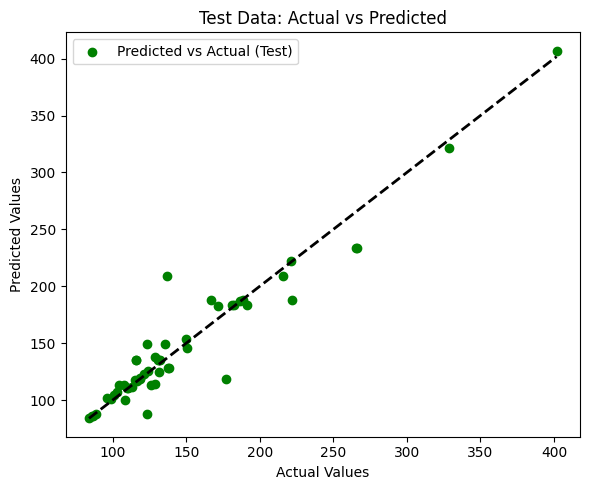

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

# Scatter plot for predicted vs actual values in the test data
plt.scatter(y_test, y_test_pred_dt, color='green', label='Predicted vs Actual (Test)')

# Plot the line for ideal predictions (diagonal line where actual equals predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


### GradientBoostingRegressor

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor with a custom decision tree as base estimator
gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict on the test data
y_test_pred = gb_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse}")

# Calculate Accuracy (R² Score)
accuracy = r2_score(y_test, y_test_pred)
print(f"Accuracy (R²): {accuracy}")

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
print(f"RMSLE: {rmsle}")


MSE: 415.90183711437936
Accuracy (R²): 0.8885752581470623
RMSLE: 0.13243654195149512


In [165]:
# Create a DataFrame for comparison of actual and predicted values
comparison_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Display the first few rows of comparison
print(comparison_gb)

        Actual   Predicted
0   115.587109  127.460758
1   166.980911  187.493238
2   131.200587  123.436855
3   328.363875  292.083167
4    99.004492  114.350105
5   108.620412  113.545450
6   149.505153  134.785471
7   104.119023  121.629811
8   115.584833  127.460758
9   177.306553  127.479130
10  123.314741  147.385684
11  138.571295  158.677344
12  128.821403  106.243406
13  137.032328  171.437048
14  221.457228  207.441689
15  107.463544  121.629811
16  265.411351  218.752037
17  125.861187  121.614308
18  401.821788  400.390708
19  122.990899   97.372030
20   88.452102  100.085507
21  132.121152  134.339796
22  135.478414  159.578219
23  182.622915  184.111500
24  186.475592  177.524475
25  115.158922  126.872008
26  191.591108  155.569783
27  131.002266  135.981958
28  131.656651  134.339796
29  124.338217  130.051157
30  110.640172  105.677757
31   86.674896  100.085507
32  103.067417  109.972408
33  118.503324  123.498527
34  150.845996  131.929786
35  221.844535  177.427045
3

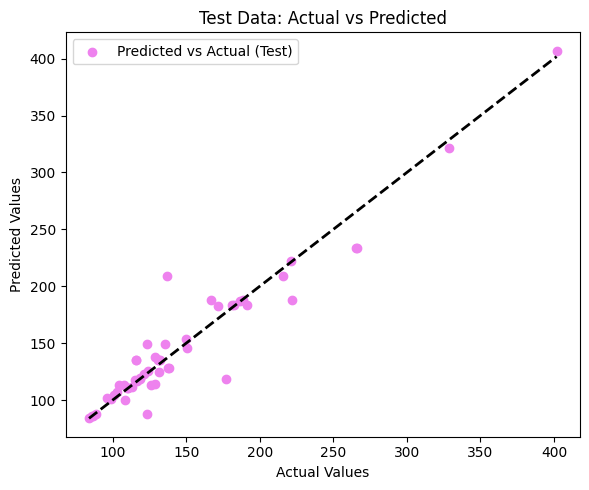

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

# Scatter plot for predicted vs actual values in the test data
plt.scatter(y_test, y_test_pred_dt, color='violet', label='Predicted vs Actual (Test)')

# Plot the line for ideal predictions (diagonal line where actual equals predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


### Linear regression

In [167]:
# Training the Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [168]:
# Predict on the test data
y_test_pred = lr.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate Accuracy (R² Score)
accuracy = r2_score(y_test, y_test_pred)

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

# Print the results
print(f"MSE: {mse}")
print(f"Accuracy (R²): {accuracy}")
print(f"RMSLE: {rmsle}")

MSE: 2015.2024687878231
Accuracy (R²): 0.46010477755035006
RMSLE: 0.26872723808042953


### SVR

In [169]:
# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define the SVR model
svr = SVR()

In [170]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],       # Types of kernels to try
    'C': [0.1, 1, 10, 100],                    # Regularization parameter
    'epsilon': [0.01, 0.1, 1],                 # Epsilon-tube within which no penalty is associated in the training loss function
    'gamma': ['scale', 'auto']                 # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train_scaled)

# Get the best model from the grid search
best_svr = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Predict using the best model
y_test_pred_scaled = best_svr.predict(X_test_scaled)

# Reverse scaling of the predictions
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate Accuracy (R² Score)
accuracy = r2_score(y_test, y_test_pred)

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

# Print the results
print(f"MSE: {mse}")
print(f"Accuracy (R²): {accuracy}")
print(f"RMSLE: {rmsle}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
MSE: 1960.7575546573003
Accuracy (R²): 0.4746911774188616
RMSLE: 0.257597611221115


### Neural Networks Implementation

In [171]:
target = ['motor_score']

features = ['beta_peakf_lfp0','beta_peakf_lfp2','beta_power_lfp0', 
            'beta_power_lfp2', 'power_diff', 'power_ratio', 'hb_lfp0',
            'hb_lfp2','skewness_lfp0','skewness_lfp2','kurtosis_lfp0',
            'kurtosis_lfp2', 'sh_entropy_lfp0','sh_entropy_lfp2',
            'beta_band_coherence','mean_bbd_lfp0','mean_bbd_lfp2','beta_power_asymmetry',
            'pac_lfp0','pac_lfp2','beta_power_stab_lfp0','beta_power_stab_lfp2','cfc_lfp0','cfc_lfp2']
 
X = data_df.drop(columns=target)

X

,beta_peakf_lfp0,beta_peakf_lfp2,beta_power_lfp0,beta_power_lfp2,power_diff,power_ratio,hb_lfp0,hb_lfp2,skewness_lfp0,skewness_lfp2,...,beta_band_coherence,mean_bbd_lfp0,mean_bbd_lfp2,beta_power_asymmetry,pac_lfp0,pac_lfp2,beta_power_stab_lfp0,beta_power_stab_lfp2,cfc_lfp0,cfc_lfp2
p1_x1,22.031598,14.215586,10.306337,3.533068,-6.773268,0.342805,0.498136,0.491980,-0.057924,-0.047028,...,0.156163,0.005818,0.006168,-0.489419,0.000336,0.000315,1.317437,0.355230,0.168406,0.057127
p1_x2,27.151257,17.935871,33.170136,13.945194,-19.224942,0.420414,0.581697,0.446251,-0.057419,-0.002274,...,0.146289,0.004996,0.006865,-0.408040,0.000287,0.000387,3.298529,2.201226,0.234405,0.125486
p2_x1,15.768549,14.744617,8.837351,2.358031,-6.479320,0.266826,0.478597,0.479173,-0.039276,-0.043310,...,0.146502,0.006607,0.005760,-0.578749,0.000245,0.000192,4.022782,0.084029,0.073433,0.029659
p2_x2,27.953336,16.212253,10.999450,3.827034,-7.172416,0.347930,0.538728,0.483530,-0.065004,0.039480,...,0.142263,0.005402,0.005882,-0.483757,0.000163,0.000672,2.215428,0.303450,0.089324,0.069670
p2_x3,15.273648,15.068862,8.863708,5.996212,-2.867496,0.676490,0.506189,0.482051,-0.018205,-0.009594,...,0.157079,0.006132,0.006375,-0.192968,0.000326,0.000326,4.021380,1.506637,0.086111,0.081557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_x4,15.307779,15.137124,8.900126,12.783154,3.883029,1.436289,0.453625,0.446491,0.089313,0.070543,...,0.150387,0.006546,0.006919,0.179079,0.000483,0.000372,0.564778,1.771462,0.076364,0.112628
p12_x5,22.270515,14.027865,11.388082,5.944366,-5.443716,0.521981,0.482976,0.464413,0.029357,0.069305,...,0.156515,0.005726,0.007660,-0.314077,0.000342,0.000301,1.570627,0.451661,0.112323,0.079401
p12_x6,22.031598,15.683221,10.161668,5.935931,-4.225737,0.584149,0.496593,0.471133,0.058958,-0.008529,...,0.151415,0.006100,0.007712,-0.262507,0.000327,0.000615,1.337872,0.871259,0.095936,0.094112
p12_x7,22.304646,15.188321,10.731291,5.376945,-5.354346,0.501053,0.489711,0.483125,0.068516,0.017908,...,0.163494,0.006159,0.008102,-0.332398,0.000436,0.000636,1.816824,0.505013,0.125528,0.115754


In [172]:
y = data_df[target]
y

,motor_score
p1_x1,83.108824
p1_x2,96.458592
p2_x1,148.599056
p2_x2,126.365803
p2_x3,105.526208
...,...
p12_x4,131.200587
p12_x5,233.384897
p12_x6,188.739309
p12_x7,127.114523


#### motor score distribution

In [173]:
# Define the ranges
bins = [50, 100, 150, 200, 250, 300, 350, 400, 450]

# Use pd.cut to bin the motor score values into the ranges
motor_score_bins = pd.cut(y['motor_score'], bins=bins)

# Count how many motor scores fall into each range
motor_score_count = motor_score_bins.value_counts().sort_index()

print('motor score distribution:',motor_score_count)

motor score distribution: motor_score
(50, 100]     11
(100, 150]    43
(150, 200]    13
(200, 250]     9
(250, 300]     5
(300, 350]     4
(350, 400]     0
(400, 450]     1
Name: count, dtype: int64


#### Data Augmentation

In [246]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def custom_smote(X, y, n_samples):
    
    # Convert inputs to numpy arrays if they're not already
    X = np.array(X)
    y = np.array(y).ravel()  # Ensure y is 1D

    # Initialize NearestNeighbors
    nn = NearestNeighbors(n_neighbors=2)  # Using 2 neighbors for interpolation
    nn.fit(X)

    # Generate synthetic samples
    synthetic_X = []
    synthetic_y = []

    # Iterate to generate synthetic samples
    for _ in range(n_samples):
        # Select a random index
        idx = np.random.randint(0, len(X))

        # Find the nearest neighbors
        distances, indices = nn.kneighbors([X[idx]], n_neighbors=2)

        # Select one of the nearest neighbors
        nn_idx = indices[0][1]

        # Generate synthetic sample by interpolation
        alpha = np.random.uniform(0, 1)
        synthetic_sample = X[idx] + alpha * (X[nn_idx] - X[idx])
        synthetic_target = y[idx] + alpha * (y[nn_idx] - y[idx])

        # Append synthetic samples
        synthetic_X.append(synthetic_sample)
        synthetic_y.append(synthetic_target)

    # Convert synthetic samples to numpy arrays
    synthetic_X = np.array(synthetic_X)
    synthetic_y = np.array(synthetic_y)

    # Combine original and synthetic samples
    X_resampled = np.vstack([X, synthetic_X])
    y_resampled = np.concatenate([y, synthetic_y])

    return pd.DataFrame(X_resampled, columns=[f'feature_{i}' for i in range(X.shape[1])]), pd.Series(y_resampled, name='motor_score')

X_resampled, y_resampled = custom_smote(X, y, n_samples=170)


In [247]:
X_resampled

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23
0,22.031598,14.215586,10.306337,3.533068,-6.773268,0.342805,0.498136,0.491980,-0.057924,-0.047028,...,0.156163,0.005818,0.006168,-0.489419,0.000336,0.000315,1.317437,0.355230,0.168406,0.057127
1,27.151257,17.935871,33.170136,13.945194,-19.224942,0.420414,0.581697,0.446251,-0.057419,-0.002274,...,0.146289,0.004996,0.006865,-0.408040,0.000287,0.000387,3.298529,2.201226,0.234405,0.125486
2,15.768549,14.744617,8.837351,2.358031,-6.479320,0.266826,0.478597,0.479173,-0.039276,-0.043310,...,0.146502,0.006607,0.005760,-0.578749,0.000245,0.000192,4.022782,0.084029,0.073433,0.029659
3,27.953336,16.212253,10.999450,3.827034,-7.172416,0.347930,0.538728,0.483530,-0.065004,0.039480,...,0.142263,0.005402,0.005882,-0.483757,0.000163,0.000672,2.215428,0.303450,0.089324,0.069670
4,15.273648,15.068862,8.863708,5.996212,-2.867496,0.676490,0.506189,0.482051,-0.018205,-0.009594,...,0.157079,0.006132,0.006375,-0.192968,0.000326,0.000326,4.021380,1.506637,0.086111,0.081557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,15.075252,14.909614,24.919925,20.323908,-4.596017,0.815250,0.476736,0.476561,0.000822,0.097914,...,0.164457,0.006074,0.007037,-0.101866,0.001374,0.000810,1.487641,1.981397,0.166987,0.181485
253,18.722307,19.577430,52.148742,16.312180,-35.836562,0.312098,0.536014,0.514665,0.031598,0.112839,...,0.135947,0.005305,0.006849,-0.529058,0.000347,0.001174,4.641443,1.140205,0.256300,0.176433
254,19.788289,14.700330,7.692800,1.874818,-5.817981,0.243679,0.510264,0.477504,-0.009881,0.017653,...,0.172306,0.005317,0.005788,-0.608155,0.000209,0.000534,1.191528,0.287020,0.089023,0.048225
255,26.241413,14.107345,9.925947,5.870690,-4.055257,0.590224,0.534270,0.484028,0.039577,0.049429,...,0.147478,0.005383,0.006361,-0.269763,0.000365,0.000231,2.080278,1.443870,0.128693,0.105102


In [248]:
y_resampled

0       83.108824
1       96.458592
2      148.599056
3      126.365803
4      105.526208
          ...    
252    104.534076
253    232.654320
254    125.728003
255    126.901192
256    295.258641
Name: motor_score, Length: 257, dtype: float64

### motor score distribution after augmentation

In [249]:
# Define the ranges
bins = [50, 100, 150, 200, 250, 300, 350, 400, 450]

# Use pd.cut to bin the motor score values into the ranges
motor_score_bins = pd.cut(y_resampled, bins=bins)

# Count how many motor scores fall into each range
motor_score_count = motor_score_bins.value_counts().sort_index()

print('motor score distribution after augmentation:\n',motor_score_count)

motor score distribution after augmentation:
 motor_score
(50, 100]      16
(100, 150]    139
(150, 200]     46
(200, 250]     31
(250, 300]     11
(300, 350]      9
(350, 400]      0
(400, 450]      1
Name: count, dtype: int64


#### Data Splitting X_train, X_test, y_train, y_test

In [250]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
print('Shape of X_train', X_train_scaled.shape)
print('Shape of y_train', y_train.shape)

print('Shape of X_test', X_test_scaled.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (205, 24)
Shape of y_train (205,)
Shape of X_test (52, 24)
Shape of y_test (52,)


### Model 1

In [252]:
# Define the model using BatchNormalization
model_active = Sequential([
    layers.BatchNormalization(input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),  # No L2 regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),  # Output layer for regression
])

# Compile the model with Adam optimizer and a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Set learning rate to 0.001
model_active.compile(
    optimizer=optimizer,
    loss='mean_squared_error'
)

# Early stopping callback to monitor 'val_loss'
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=100,  # Number of epochs to wait before stopping
    restore_best_weights=True
)


c:\Users\Ali Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [253]:

# Train the model with early stopping
history_active = model_active.fit(
    X_train_scaled.astype('float32'), y_train.astype('float32'),
    validation_data=(X_test_scaled.astype('float32'), y_test.astype('float32')),
    epochs=500,  # Max number of epochs
    callbacks=[early_stopping],
    verbose=2  # Show training progress
)


Epoch 1/500
7/7 - 2s - 340ms/step - loss: 36023.5508 - val_loss: 23700.0039
Epoch 2/500
7/7 - 0s - 12ms/step - loss: 35835.9336 - val_loss: 23542.4023
Epoch 3/500
7/7 - 0s - 12ms/step - loss: 35619.3867 - val_loss: 23344.6660
Epoch 4/500
7/7 - 0s - 12ms/step - loss: 35329.7617 - val_loss: 23088.7988
Epoch 5/500
7/7 - 0s - 11ms/step - loss: 34944.3438 - val_loss: 22747.7832
Epoch 6/500
7/7 - 0s - 11ms/step - loss: 34406.4883 - val_loss: 22290.8516
Epoch 7/500
7/7 - 0s - 12ms/step - loss: 33603.5820 - val_loss: 21660.1777
Epoch 8/500
7/7 - 0s - 12ms/step - loss: 32627.5430 - val_loss: 20803.1016
Epoch 9/500
7/7 - 0s - 12ms/step - loss: 31300.7363 - val_loss: 19655.9004
Epoch 10/500
7/7 - 0s - 11ms/step - loss: 29294.0312 - val_loss: 18140.1250
Epoch 11/500
7/7 - 0s - 11ms/step - loss: 26800.6250 - val_loss: 16254.7119
Epoch 12/500
7/7 - 0s - 12ms/step - loss: 23499.0801 - val_loss: 14001.6396
Epoch 13/500
7/7 - 0s - 12ms/step - loss: 20342.1504 - val_loss: 11526.5977
Epoch 14/500
7/7 - 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training MSE: 192.649724712576
Training R²: 0.9758746825437159
Testing MSE: 391.94049483594483
Testing R²: 0.8615151978888633


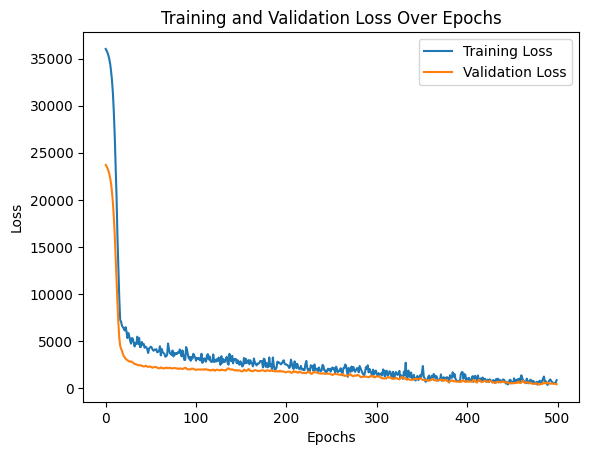

In [254]:
# Evaluate the model on the training data
y_train_pred = model_active.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the testing data
y_test_pred = model_active.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print training and testing performance
print(f'Training MSE: {train_mse}')
print(f'Training R²: {train_r2}')
print(f'Testing MSE: {test_mse}')
print(f'Testing R²: {test_r2}')

# Plot training vs validation loss to compare
plt.plot(history_active.history['loss'], label='Training Loss')
plt.plot(history_active.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


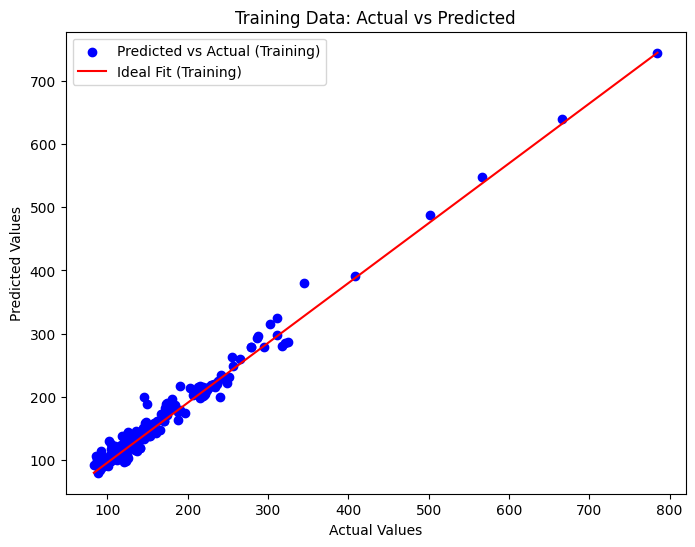

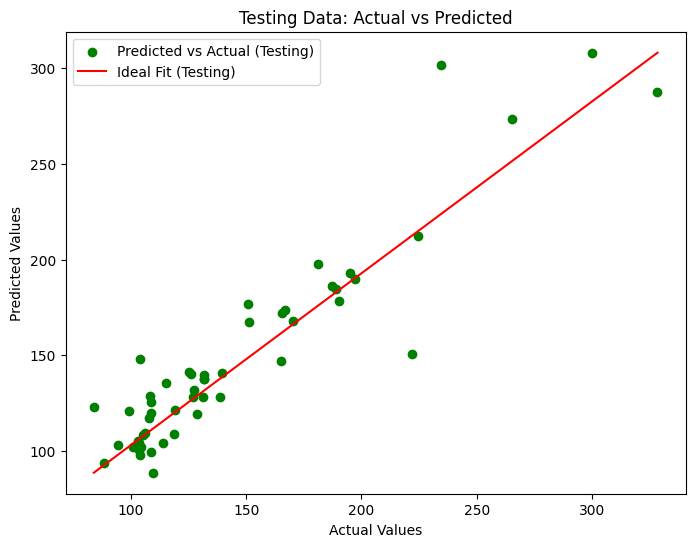

In [257]:
# Plot Prediction vs Actual for Training Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted vs Actual (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red', label='Ideal Fit (Training)')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot Prediction vs Actual for Testing Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted vs Actual (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red', label='Ideal Fit (Testing)')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [258]:
# Print Actual and Predicted values for the training data
print("Training Data: Actual vs Predicted")
for actual, predicted in zip(y_train, y_train_pred):
    print(f"Actual: {actual}, Predicted: {predicted[0]}")

# Print Actual and Predicted values for the testing data
print("\nTesting Data: Actual vs Predicted")
for actual, predicted in zip(y_test, y_test_pred):
    print(f"Actual: {actual}, Predicted: {predicted[0]}")


Training Data: Actual vs Predicted
Actual: 125.077025313134, Predicted: 143.40460205078125
Actual: 104.47835775464542, Predicted: 107.0108413696289
Actual: 132.209112196938, Predicted: 119.7002182006836
Actual: 286.9991418332844, Predicted: 295.4143371582031
Actual: 278.338556458396, Predicted: 279.1357421875
Actual: 106.69521352249558, Predicted: 112.01205444335938
Actual: 152.21166183976914, Predicted: 153.71463012695312
Actual: 125.22570191991292, Predicted: 126.37287902832031
Actual: 217.74132485421046, Predicted: 201.01278686523438
Actual: 140.8372769474649, Predicted: 117.7883529663086
Actual: 286.824007923333, Predicted: 293.5214538574219
Actual: 666.2864437055799, Predicted: 640.0204467773438
Actual: 153.26692159277118, Predicted: 150.84829711914062
Actual: 126.14269598086567, Predicted: 131.29989624023438
Actual: 229.23875515038796, Predicted: 218.1205291748047
Actual: 248.5580695433149, Predicted: 221.9021759033203
Actual: 144.13442890315665, Predicted: 150.90850830078125
Act

In [259]:
custom_input = X_test_scaled[0]  # You can use any input, or create a new one

# Reshape the input to match the model's expected input shape
custom_input = np.reshape(custom_input, (1, -1))  # Reshape to (1, n_features)

# Predict using the model
custom_prediction = model_active.predict(custom_input)

# Print custom input and predicted output
print("Custom Input:", custom_input)
print("Predicted Output:", custom_prediction[0])

# Optionally compare with actual output using .iloc[] to avoid KeyError
actual_output = y_test.iloc[0]  # Corresponding actual value
print("Actual Output:", actual_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Custom Input: [[ 0.3115938  -0.13321124 -0.84671393 -0.51692222  0.66656782  0.2576774
   0.01110363 -0.30736549 -0.17808222 -0.20043812 -0.44915653 -0.67199436
   0.9592413   1.54513898  0.28933531 -0.63744705 -0.87118341  0.42004446
  -0.20502932  0.10137206 -0.55861067 -0.83615602 -0.72352812 -0.36018555]]
Predicted Output: [103.836174]
Actual Output: 113.85364732177088


### Model 2

In [276]:
# Define the model using BatchNormalization
model_active = Sequential([
    layers.BatchNormalization(input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),  # No L2 regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),  # Output layer for regression
])


# Compile the model with RMSprop optimizer and a custom learning rate
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)  # Set learning rate to 0.001
model_active.compile(
    optimizer=optimizer,
    loss='mean_squared_error'
)

# Early stopping callback to monitor 'val_loss'
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=100,  # Number of epochs to wait before stopping
    restore_best_weights=True
)

c:\Users\Ali Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [277]:
# Train the model with early stopping
history_active = model_active.fit(
    X_train_scaled.astype('float32'), y_train.astype('float32'),
    validation_data=(X_test_scaled.astype('float32'), y_test.astype('float32')),
    epochs=500,  # Max number of epochs
    callbacks=[early_stopping],
    verbose=2  # Show training progress
)

Epoch 1/500
7/7 - 1s - 212ms/step - loss: 36084.9727 - val_loss: 23706.9160
Epoch 2/500
7/7 - 0s - 13ms/step - loss: 35838.5469 - val_loss: 23501.3887
Epoch 3/500
7/7 - 0s - 11ms/step - loss: 35524.6719 - val_loss: 23241.0449
Epoch 4/500
7/7 - 0s - 14ms/step - loss: 35149.5547 - val_loss: 22917.5586
Epoch 5/500
7/7 - 0s - 17ms/step - loss: 34660.3398 - val_loss: 22481.5332
Epoch 6/500
7/7 - 0s - 14ms/step - loss: 34016.8008 - val_loss: 21953.8008
Epoch 7/500
7/7 - 0s - 13ms/step - loss: 33269.2734 - val_loss: 21320.4883
Epoch 8/500
7/7 - 0s - 20ms/step - loss: 32166.4023 - val_loss: 20538.3848
Epoch 9/500
7/7 - 0s - 10ms/step - loss: 31026.6953 - val_loss: 19636.1074
Epoch 10/500
7/7 - 0s - 10ms/step - loss: 29545.7656 - val_loss: 18632.1367
Epoch 11/500
7/7 - 0s - 13ms/step - loss: 27993.0371 - val_loss: 17533.4961
Epoch 12/500
7/7 - 0s - 12ms/step - loss: 25982.9180 - val_loss: 16301.7832
Epoch 13/500
7/7 - 0s - 11ms/step - loss: 24713.8262 - val_loss: 15008.0889
Epoch 14/500
7/7 - 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training MSE: 422.6832502558122
Training R²: 0.9470678319883955
Testing MSE: 429.99989819551115
Testing R²: 0.8480676235448966


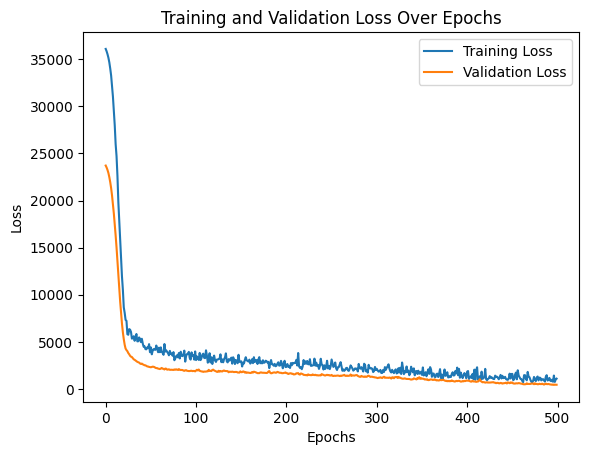

In [278]:
# Evaluate the model on the training data
y_train_pred = model_active.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the testing data
y_test_pred = model_active.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print training and testing performance
print(f'Training MSE: {train_mse}')
print(f'Training R²: {train_r2}')
print(f'Testing MSE: {test_mse}')
print(f'Testing R²: {test_r2}')

# Plot training vs validation loss to compare
plt.plot(history_active.history['loss'], label='Training Loss')
plt.plot(history_active.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


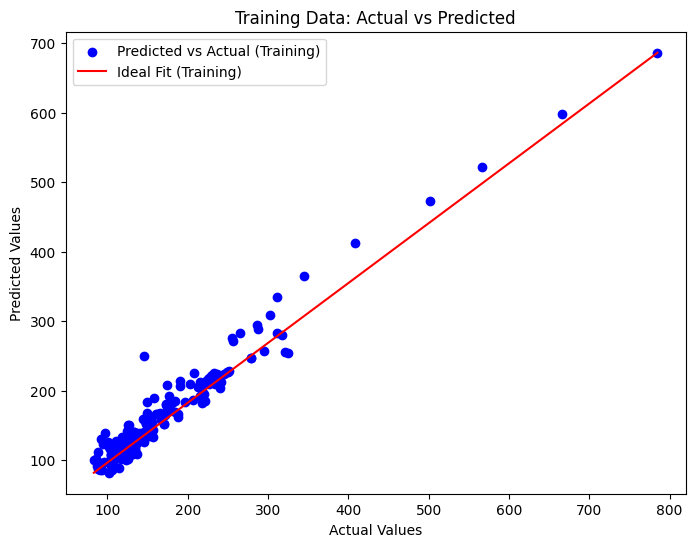

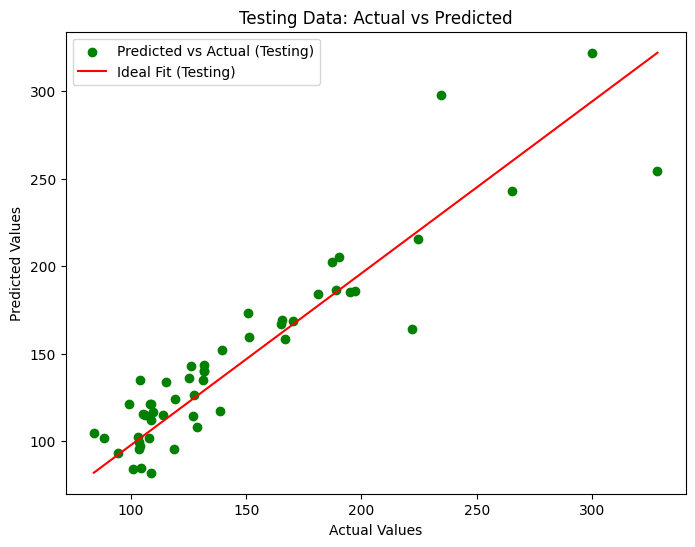

In [281]:
# Plot Prediction vs Actual for Training Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted vs Actual (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red', label='Ideal Fit (Training)')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot Prediction vs Actual for Testing Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted vs Actual (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red', label='Ideal Fit (Testing)')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()